In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)
# Import necessary libraries and set random seeds for reproducibility.


In [ ]:
from tensorflow import keras
# Import the keras module from TensorFlow.


In [ ]:
from keras.layers import Dense , Conv2D , MaxPool2D , Dropout , Flatten
from keras.models import Sequential
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import specific layers for building the CNN, Sequential model, Fashion MNIST dataset, metrics, and plotting libraries.


In [ ]:
(X_train , y_train) , (X_test,y_test) = fashion_mnist.load_data()
# Load the Fashion MNIST dataset, splitting it into training and testing sets.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# Print the shapes of the training and testing data and labels.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


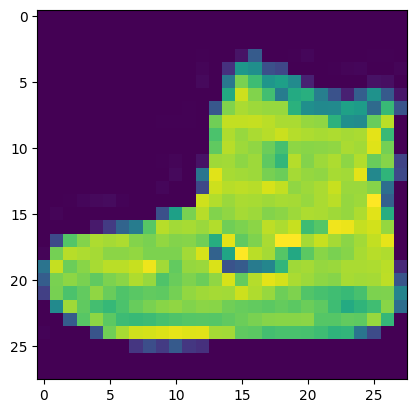

In [ ]:
plt.imshow(X_train[0])
# Display the first image from the training dataset.


In [ ]:
data_class = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}
# Create a dictionary to map class indices to their corresponding fashion item names.


In [ ]:
print("Data is : " , data_class[y_train[0]])
# Print the class label for the first training image using the data_class dictionary.


Data is :  Ankle boot


In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test  =X_test.astype("float32") / 255.0
# Normalize the pixel values of the training and testing images to a range of 0 to 1.


In [ ]:
print(X_train[0])
# Print the normalized pixel values of the first training image.


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
print(X_test[0])
# Print the normalized pixel values of the first testing image.


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))
# Reshape the image data to include a channel dimension, as required by Conv2D layers.


In [ ]:
print(X_train.shape)
print(X_test.shape)
# Print the new shapes of the training and testing data after reshaping.


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = Sequential()
# Initialize a sequential Keras model.


In [ ]:
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
# Add convolutional and max-pooling layers to build the feature extraction part of the CNN.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Add a Flatten layer, a Dropout layer for regularization, and dense layers for classification.


In [ ]:
model.summary()
# Display a summary of the model architecture.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Compile the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.


In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)
# Train the model for 10 epochs, using 30% of the training data for validation.


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7571 - loss: 0.6615 - val_accuracy: 0.8771 - val_loss: 0.3295
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8837 - loss: 0.3184 - val_accuracy: 0.8874 - val_loss: 0.2986
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9025 - loss: 0.2634 - val_accuracy: 0.9103 - val_loss: 0.2433
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9120 - loss: 0.2331 - val_accuracy: 0.9166 - val_loss: 0.2273
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9232 - loss: 0.2080 - val_accuracy: 0.9218 - val_loss: 0.2186
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9291 - loss: 0.1887 - val_accuracy: 0.9226 - val_loss: 0.2129
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9351 - loss: 0.1743 - val_accuracy: 0.9286 - val_loss: 0.2041
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9411 - loss: 0.1605 

In [ ]:
test_loss , test_acc = model.evaluate(X_test,y_test)
print("Test accuracy : ", test_acc)
print("Test loss : ", test_loss)
# Evaluate the trained model on the test dataset.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2486
Test accuracy :  0.9240000247955322
Test loss :  0.23411455750465393


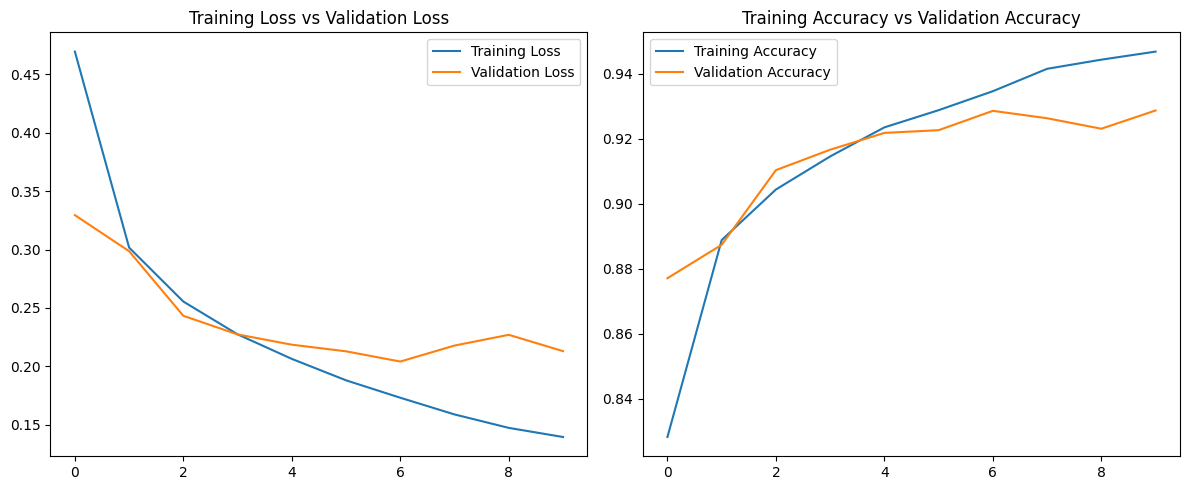

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training Loss vs Validation Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training Accuracy vs Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()
# Plot the training and validation loss and accuracy over epochs.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.88      0.89      1000
           3       0.93      0.93      0.93      1000
           4       0.91      0.87      0.89      1000
           5       0.98      0.99      0.99      1000
           6       0.73      0.84      0.78      1000
           7       0.96      0.99      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



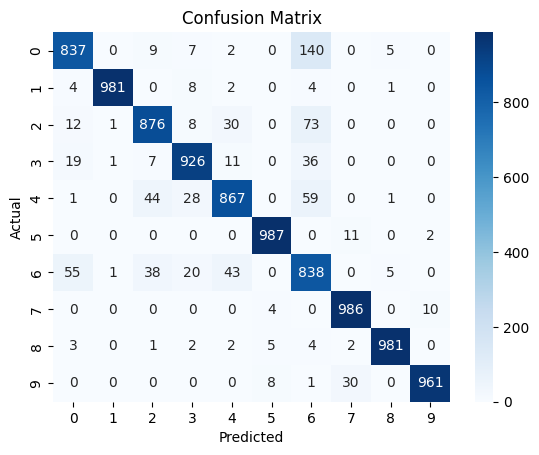

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

print(classification_report(y_test,y_pred))

matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Make predictions on the test set, generate a classification report, and display a confusion matrix.


Sample Testing

In [ ]:
sample_data = X_test[1999]
# Select a sample image from the test set.


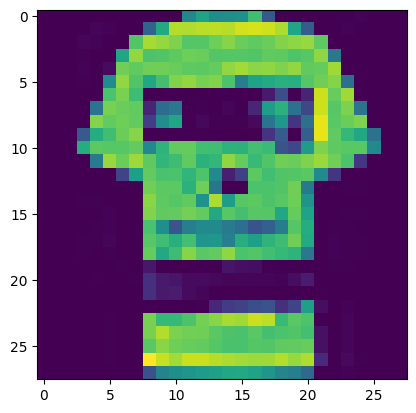

In [ ]:
plt.imshow(sample_data)
plt.show()
# Display the selected sample image.


In [ ]:
Y_pred = model.predict(sample_data.reshape(1,28,28,1))
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
# Make a prediction on the single sample image and print the predicted class index.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
[0]


In [ ]:
print("Predicted : " , data_class[y_pred[0]])
print("Actual : " , data_class[y_test[1999]])
# Print the predicted and actual class names for the sample image.


Predicted : , T-shirt/top
Actual : , T-shirt/top


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of correctly classified images: 9240
Number of incorrectly classified images: 760


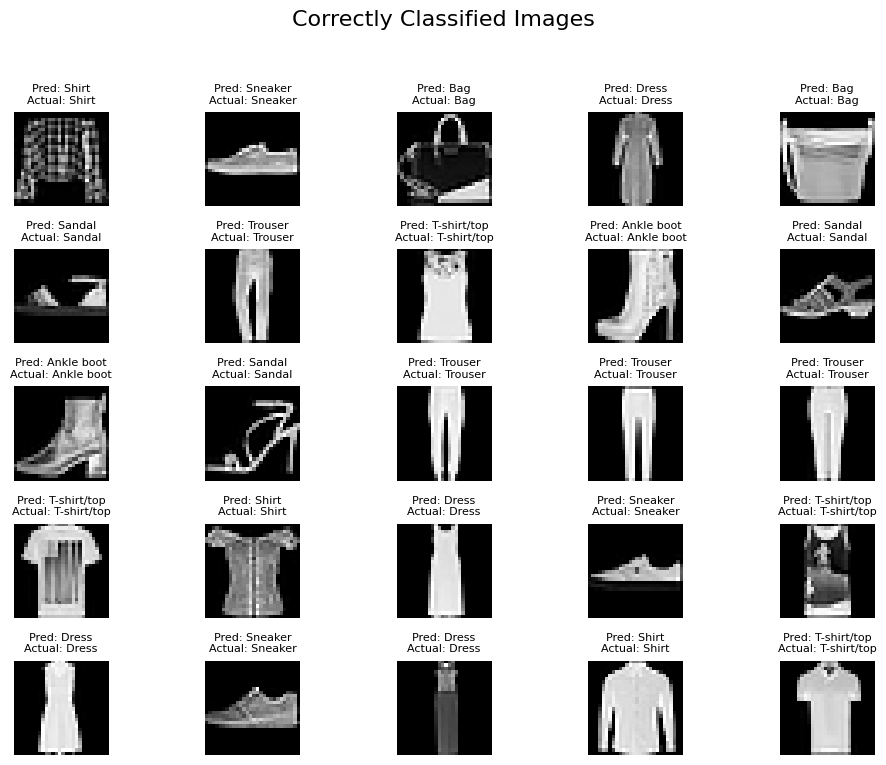

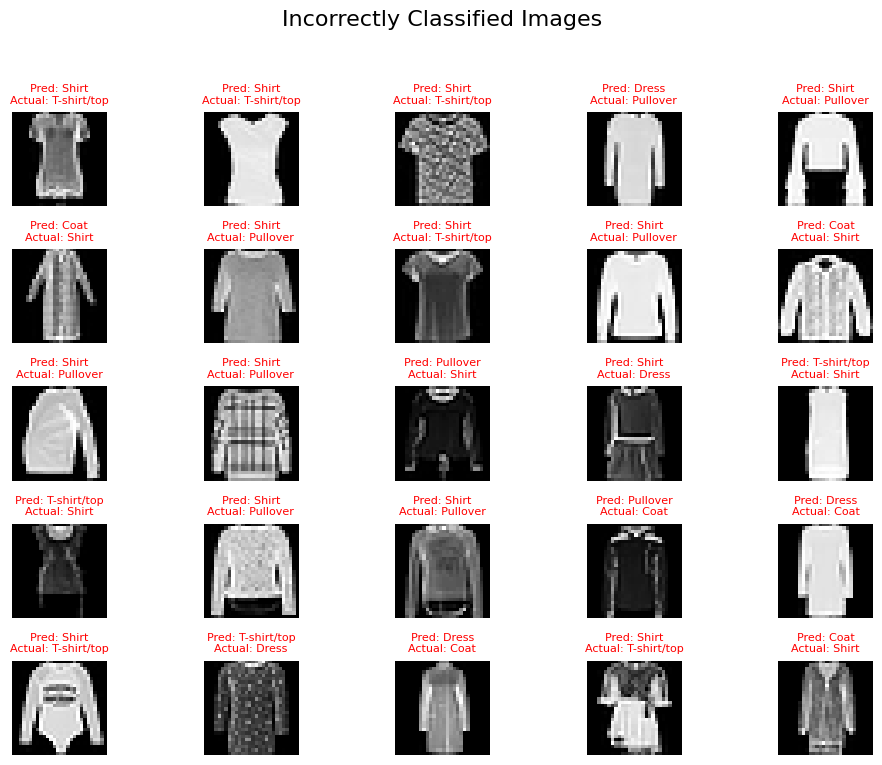

In [ ]:
y_pred_full = model.predict(X_test)
y_pred_full = np.argmax(y_pred_full,axis=1)

correct_indices = np.where(y_pred_full == y_test)[0]
incorrect_indices = np.where(y_pred_full != y_test)[0]

print(f"Number of correctly classified images: {len(correct_indices)}")
print(f"Number of incorrectly classified images: {len(incorrect_indices)}")

plt.figure(figsize=(10, 8))
plt.suptitle("Correctly Classified Images", fontsize=16)
for i, correct in enumerate(random.sample(list(correct_indices), min(25, len(correct_indices)))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {data_class[y_pred_full[correct]]}\nActual: {data_class[y_test[correct]]}", fontsize=8)
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(10, 8))
plt.suptitle("Incorrectly Classified Images", fontsize=16)
for i, incorrect in enumerate(random.sample(list(incorrect_indices), min(25, len(incorrect_indices)))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {data_class[y_pred_full[incorrect]]}\nActual: {data_class[y_test[incorrect]]}", fontsize=8, color='red')
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Predict on the full test set, identify correctly and incorrectly classified images, and visualize random samples.
